In [ ]:
# Import PyTorch
import torch

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
torch.manual_seed(42) # Setting the seed

In [ ]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# Data preprocessing and visualization




Loading the Dataset:

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16318290.86it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 307825.72it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5479381.35it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 8427898.90it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## 3.Phase one

In [ ]:
classes = train_data.classes
print('Clasess Count: ', len(classes))
print('Classes: ', classes)

Clasess Count:  10
Classes:  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


As we can see, the number of classes in this dataset is two, and each class represents a type of clothes.

In [ ]:
import random
random.seed(42)
pics = []
for i in range(len(classes)):
    class_indices = torch.where(train_data.targets == i)[0] #calss_indices are the indice of the data in each class
    class_pic = train_data.data[class_indices[random.randint(0,5999)]] #choosing a pic from each class
    pics.append(class_pic)

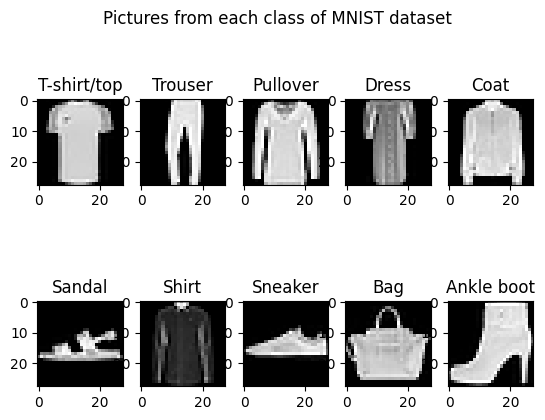

In [ ]:
fig, axes = plt.subplots(2, 5)
fig.suptitle('Pictures from each class of MNIST dataset')

for i in range(2):
    for j in range(5):
        axes[i, j].imshow(pics[i * 5  + j], cmap='gray')
        axes[i, j].set_title(classes[i * 5  + j])

##4. Phase Two - Prepare DataLoader



> ### 4.1
>>Using batches in the training process has several reasons:

>>>1️⃣ Memory Efficiency: When training machine learning models, especially deep learning models, the dataset might be too large to fit entirely into memory. Batching allows us to process a small subset of the data at a time, reducing memory requirements.

>>>2️⃣ Computational Efficiency: Performing updates on the model parameters after processing each individual example can be computationally expensive. Using batches allows us to perform updates less frequently, resulting in faster training times.

>>Advantages of very small batch sizes:
1. Faster convergence: Small batch sizes make model update parameters more frequently, leading to faster convergence. It helps when there is a time constraint for training.
2. Less memory usage: Small batch sizes need less memory to store intermediate activations and gradients during training. It is useful when computational resources are limited.
3. Generalization: Small batch sizes can improve model generalization since the model is exposed to more diverse examples within each epoch. It can help prevent overfitting by introducing more randomness into the learning process.

>>Disadvantages of very small batch sizes:
1. Noisy gradients: Small batch sizes introduce more noise in gradient estimation due to the limited number of samples. This can lead to unstable updates and slower convergence.
2. Slower training: Training with small batch sizes can be slower as the model needs to process and update parameters more frequently. Data loading and parameter updates become more time-consuming.

>>Advantages of very large batch sizes:
1. Faster training: Large batch sizes process more samples in parallel, leveraging efficient parallel computation on modern hardware for faster training.
2. Stable gradients: With more samples in each batch, gradient estimation becomes more stable, resulting in smoother parameter updates and faster convergence.
3.Improved Efficiency: Larger batches take better advantage of parallel computing capabilities, especially when training on hardware like GPUs. This can lead to faster training times, especially for large-scale models.

>>Disadvantages of very large batch sizes:
1. Memory requirements: Very large batch sizes need more memory to store intermediate activations and gradients, which can be challenging with limited GPU memory.
2. Generalization issues: Large batch sizes may lead to worse generalization compared to small batch sizes. The model may overfit to specific batch samples instead of learning diverse patterns from the entire dataset.

>>It's important to note that the choice of batch size depends on various factors, such as the dataset size, model complexity, available computational resources, and specific problem requirements. Balancing these factors is crucial in determining an appropriate batch size.


> ### 4.2

>>🔄 The `shuffle` parameter in the `DataLoader` class is used to specify whether the data should be shuffled between epochs during training. When `shuffle=True`, the data is randomly re-ordered before each epoch. When `shuffle=False`, the data remains in the original order.

>>Here's when you should consider using the `shuffle` parameter:

>>>1️⃣ Training Neural Networks: When training neural networks, it's often beneficial to shuffle the data between epochs. Shuffling prevents the model from learning the order or any hidden patterns in the data. It encourages the model to generalize better and perform well on unseen examples.

>>>2️⃣ Utilizing Randomness: If the data has inherent randomness, such as in cases of time-series analysis or when the order of the data is not informative, shuffling can help randomize the samples and reduce any bias that might be introduced by the ordering.

>>>3️⃣ Avoiding Overfitting: Shuffling is particularly useful when dealing with limited datasets or when the training data has a specific order. Without shuffling, the model might focus more on memorizing the patterns instead of learning the underlying relationships, which can lead to overfitting.

>>>4️⃣ Maintaining Consistency: On the other hand, there may be scenarios where you want to maintain the original order of the data, such as in sequence prediction tasks or when working with temporal data. In such cases, setting `shuffle=False` ensures the model sees the data in the intended order.

>>Remember that the decision to shuffle or not depends on the nature of the data, the problem you're solving, and the learning algorithm you're using. It's recommended to experiment with both options and evaluate their impact on the model's performance. 😄

>## 4.3
>>The choice of batch size can indeed have an impact on the model's performance and accuracy. Here are a few effects to consider:

>>>1️⃣ Training Performance: Smaller batch sizes typically result in faster training performance because they require less memory to store intermediate results. This can be advantageous when working with limited computational resources or when training on large datasets. However, smaller batch sizes also increase the number of iterations needed to complete each epoch, potentially leading to longer training times overall.

>>>2️⃣ Generalization: Larger batch sizes may contribute to better generalization. The model sees more diverse examples within each batch, which can help it learn more robust and representative features. This can result in improved accuracy, especially when dealing with complex datasets with high variance or when using regularization techniques like dropout.

>>>3️⃣ Convergence: Smaller batch sizes can sometimes help the model converge faster. Each update is computed based on a smaller subset of the data, which can lead to more frequent weight updates and faster convergence to a good solution. However, larger batch sizes generally give rise to more stable updates as they capture the overall trend of the data.

>>>4️⃣ Overfitting: Using smaller batch sizes can act as a form of regularization and help reduce overfitting. By exposing the model to fewer examples at each iteration, it's less likely to memorize the training data, leading to better generalization on unseen data. Conversely, larger batch sizes might provide more opportunities for the model to overfit the training set if it has enough capacity.

>>Choosing the right batch size involves finding the right balance between these factors. It often requires empirical experimentation on the specific dataset, model architecture, and computational resources available. It's common to start with batch sizes in the range of 32 to 128 and then tweak them based on performance and resource constraints. 😉

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle=True)

# Data Classification



## 5.Phase Three - Data Classification

>## 5.1
>>The nn.Flatten() layer is used to reshape the input data from a multidimensional tensor (e.g., [color_channels, height, width]) to a one-dimensional tensor (e.g., [color_channels, height*width]). This transformation is necessary in certain cases, and here's why:

>>1️⃣ Compatibility with Fully Connected Layers: The nn.Flatten() layer is often used when transitioning from convolutional or pooling layers to fully connected layers in a neural network. Fully connected layers expect a one-dimensional input, where each element corresponds to a separate input feature. By flattening the tensor, we ensure that the output of the convolutional layers can be properly connected to the subsequent fully connected layers.

>>2️⃣ Preserving Spatial Information: When working with image data, the spatial structure and relationships between pixels in different regions are important. Convolutional layers can capture these spatial patterns effectively. However, fully connected layers do not consider spatial information and treat each input feature independently. By flattening the tensor, we convert the spatial information into a sequential representation, allowing fully connected layers to process the data while still preserving the feature information extracted by the convolutional layers.

>>3️⃣ Reducing the Number of Parameters: Flattening the tensor reduces the number of dimensions in the data, effectively reducing the total number of parameters in the network. This can be beneficial in terms of computational efficiency and model complexity, making the network easier to train and less prone to overfitting, especially when working with large images.

>By performing the flatten operation, we transform the input tensor to a format suitable for subsequent fully connected layers, ensuring compatibility and preserving the essential information extracted by preceding convolutional layers.

>Summery: Because many neural network arcs, such as fully connected layers, require a 1-dim input. Flattening the input allows us to feed it into these layers, ensuring compatibility and enabling the network to learn patterns and features across the entire image.

In [ ]:
from torch import nn
class MMD_model(nn.Module):
    def __init__(self, num_inputs, num_hidden1 , num_hidden2, num_outputs): # You can add more parameters if you wish, e.g. more hidden layers.
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(num_inputs, num_hidden1)
        self.linear2 = nn.Linear(num_hidden1, num_hidden2)
        self.linear3 = nn.Linear(num_hidden2, num_outputs)
        self.act_fn = nn.LeakyReLU()

    def forward(self, x):
      x = self.flatten(x)
      x = self.linear1(x)
      x = self.act_fn(x)
      x = self.linear2(x)
      x = self.act_fn(x)
      x = self.linear3(x)
      return x


After creating your instance of model, you can use GPU for training it (if available) by the following code:

In [ ]:
model = MMD_model(num_inputs = 28*28, num_hidden1=256 , num_hidden2=64, num_outputs=10)
model = model.to(device)
print(model)

MMD_model(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (act_fn): LeakyReLU(negative_slope=0.01)
)


In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([256, 784])
Parameter linear1.bias, shape torch.Size([256])
Parameter linear2.weight, shape torch.Size([64, 256])
Parameter linear2.bias, shape torch.Size([64])
Parameter linear3.weight, shape torch.Size([10, 64])
Parameter linear3.bias, shape torch.Size([10])


#### Setup loss, optimizer and evaluation metrics


We can calculate the loss for a batch by simply performing a few tensor operations as those are automatically added to the computation graph. For instance, for  classification, we can use  Cross Entropy (BCE) which is defined as follows:

$$\mathcal{L}_{CE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

where $y$ are our labels, and $x$ our predictions, both in the range of $[0,1]$. However, PyTorch already provides a list of predefined loss functions which we can use (see [here](https://pytorch.org/docs/stable/nn.html#loss-functions) for a full list). For instance, for BCE, PyTorch has two modules: `nn.CrossEntropyLoss()`. While `nn.CrossEntropyLoss` expects the inputs $x$ to be in the range $[0,1]$, i.e. This version is numerically more stable than using a plain Sigmoid followed by a CE loss because of the logarithms applied in the loss function.

In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

#### Implementing training and test loops

In [ ]:
epochs = 10
from tqdm.notebook import tqdm
for epoch in tqdm(range(epochs)):
    train_loss = 0.0
    test_loss = 0.0
    print("Epoch {}/{}".format(epoch, epochs))
    print("-"*10)
    # Training loop
    model.train()  # Set model to training mode
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()  # Clear gradients

        outputs = model(images)  # Forward pass
        loss = loss_fn(outputs, labels)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        train_loss += loss.item() * images.size(0)

    # Test loop
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = loss_fn(outputs, labels)

            test_loss += loss.item() * images.size(0)

    train_loss = train_loss / len(train_loader.dataset)
    test_loss = test_loss / len(test_loader.dataset)
    print("Train Loss is:{:.4f}, Test Loss is:{:.4f}".format(train_loss, test_loss))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0/10
----------
Train Loss is:0.2204, Test Loss is:0.3132
Epoch 1/10
----------
Train Loss is:0.2147, Test Loss is:0.3103
Epoch 2/10
----------
Train Loss is:0.2120, Test Loss is:0.3087
Epoch 3/10
----------
Train Loss is:0.2102, Test Loss is:0.3078
Epoch 4/10
----------
Train Loss is:0.2088, Test Loss is:0.3073
Epoch 5/10
----------
Train Loss is:0.2078, Test Loss is:0.3067
Epoch 6/10
----------
Train Loss is:0.2069, Test Loss is:0.3065
Epoch 7/10
----------
Train Loss is:0.2061, Test Loss is:0.3062
Epoch 8/10
----------
Train Loss is:0.2054, Test Loss is:0.3061
Epoch 9/10
----------
Train Loss is:0.2049, Test Loss is:0.3060


##### Implementing Evaluation

In [33]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:

            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=0)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = ([torch.argmax(i) for i in preds]) # Binarize predictions to 0 and 1
            pred_labels = torch.tensor([i.item() for i in pred_labels])
            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = loss_fn(outputs, labels)

            test_loss += loss.item() * images.size(0)

    test_loss = test_loss / len(test_loader.dataset)
    print("Test Loss is:{:.4f}".format( test_loss))
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [34]:
eval_model(model ,test_loader )

Test Loss is:0.3060
Accuracy of the model: 89.28%
